In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
csv_path = 'Airbnb_Open_Data.csv'
df = pd.read_csv(csv_path)
df.count

C:\Users\ethan\AppData\Local\Temp\ipykernel_5508\215615518.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


<bound method DataFrame.count of              id                                              NAME  \
0       1001254                Clean & quiet apt home by the park   
1       1002102                             Skylit Midtown Castle   
2       1002403               THE VILLAGE OF HARLEM....NEW YORK !   
3       1002755                                               NaN   
4       1003689  Entire Apt: Spacious Studio/Loft by central park   
...         ...                                               ...   
102594  6092437                        Spare room in Williamsburg   
102595  6092990                     Best Location near Columbia U   
102596  6093542                    Comfy, bright room in Brooklyn   
102597  6094094                  Big Studio-One Stop from Midtown   
102598  6094647                              585 sf Luxury Studio   

            host id host_identity_verified    host name neighbourhood group  \
0       80014485718            unconfirmed     Madaline    

In [17]:
df['reviews per month'].fillna(0, inplace=True)
df['review rate number'].fillna(0, inplace=True)

C:\Users\ethan\AppData\Local\Temp\ipykernel_5508\4185038556.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews per month'].fillna(0, inplace=True)
C:\Users\ethan\AppData\Local\Temp\ipykernel_5508\4185038556.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

==========================================================================
### Les logements à Manhattan sont le plus consulté 

=> c'est la zone la plus populaire.
Faire un graph qui compare les review entre Manhattan et les autres. Un vs all
Et un vs all together

In [18]:
# Nettoyage des colonnes numériques
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)
df['number of reviews'] = pd.to_numeric(df['number of reviews'], errors='coerce').fillna(0)


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ethan\AppData\Local\Temp\ipykernel_5508\2441343140.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\ethan\AppData\Local\Temp\ipykernel_5508\2441343140.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)


In [19]:
# Créer une colonne binaire : est-ce à Manhattan ?
df['is_manhattan'] = df['neighbourhood group'] == 'Manhattan'

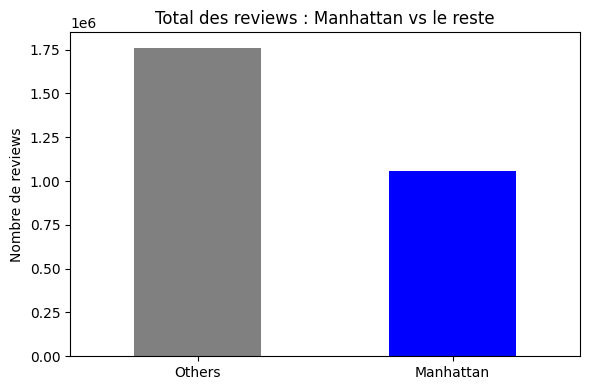

In [20]:

# Agrégation : Manhattan vs autres
agg_manhattan_vs_others = df.groupby('is_manhattan')['number of reviews'].sum()
agg_manhattan_vs_others.index = ['Others', 'Manhattan']  # False -> Others, True -> Manhattan

# Graph 1 : Manhattan vs Others
plt.figure(figsize=(6,4))
agg_manhattan_vs_others.plot(kind='bar', color=['gray', 'blue'])
plt.title("Total des reviews : Manhattan vs le reste")
plt.ylabel("Nombre de reviews")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

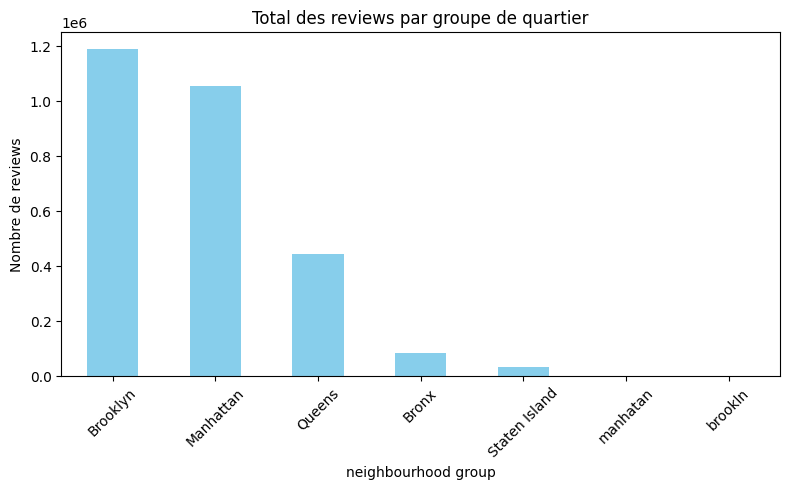

In [21]:
# Graph 2 : Tous les groupes de quartiers
agg_all_neigh = df.groupby('neighbourhood group')['number of reviews'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
agg_all_neigh.plot(kind='bar', color='skyblue')
plt.title("Total des reviews par groupe de quartier")
plt.ylabel("Nombre de reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

===================================================
### Les logements avec des politiques d'annulation flexibles sont plus review 
=> C'est un critère de filtres pour les gens qui recherchent. Donc si il y'a un lien de causalité entre le nb de reveiw et les politiques d'annulation flexibles, ca veut dire que les gens recherchent ca.


cancellation_policy
flexible    27.518724
moderate    27.417873
strict      27.292089
Name: number of reviews, dtype: float64


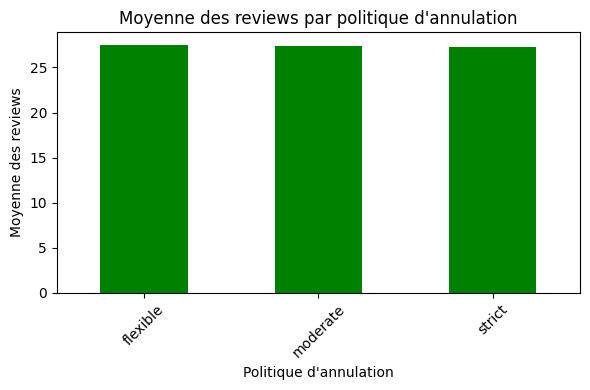

In [22]:
# Nettoyage
df['number of reviews'] = pd.to_numeric(df['number of reviews'], errors='coerce').fillna(0)

# Grouper par la politique d'annulation
cancellation_stats = df.groupby('cancellation_policy')['number of reviews'].mean().sort_values(ascending=False)

# Afficher les statistiques
print(cancellation_stats)

# Visualiser les résultats
plt.figure(figsize=(6, 4))
cancellation_stats.plot(kind='bar', color='green')
plt.title("Moyenne des reviews par politique d'annulation")
plt.ylabel("Moyenne des reviews")
plt.xlabel("Politique d'annulation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

==========================================================================
### Les prix moyens / dans la moyenne sont les plus attractifs 
=> postulat :  les gens avec revenus moyen sont la majorité. Autrement dit, sur ceux qui cherchent logement, les plus review sont ceux qui ont un prix dans la moyenne
Taper dans la moyenne des reveiw +/- 10%~, sortir les prix associés. Sortir min / max et mean. 


In [23]:

df['number of reviews'] = pd.to_numeric(df['number of reviews'], errors='coerce')
df['price'] = df['price'].replace('[\$, ]', '', regex=True).astype(float)

# Moyenne des reviews
mean_reviews = df['number of reviews'].mean()

# Groupes
low_reviews = df[df['number of reviews'] < 50]
medium_reviews = df[(df['number of reviews'] >= mean_reviews * 0.90) & 
                    (df['number of reviews'] <= mean_reviews * 1.10)]
high_reviews = df[df['number of reviews'] > 250]

# Fonction de résumé
def summarize_price(group, label):
    prices = group['price'].dropna()
    return {
        'label': label,
        'count': len(prices),
        'min_price': prices.min(),
        'mean_price': prices.mean(),
        'max_price': prices.max()
    }

# Résumés
summary_low = summarize_price(low_reviews, '📉 Peu populaires (<50 reviews)')
summary_med = summarize_price(medium_reviews, '📊 Moyenne popularité (±10% moyenne)')
summary_high = summarize_price(high_reviews, '📈 Très populaires (>250 reviews)')

# Afficher
for summary in [summary_low, summary_med, summary_high]:
    print(f"\n{summary['label']} ({summary['count']} logements):")
    print(f" - Prix minimum : ${summary['min_price']:.2f}")
    print(f" - Prix moyen   : ${summary['mean_price']:.2f}")
    print(f" - Prix maximum : ${summary['max_price']:.2f}")



📉 Peu populaires (<50 reviews) (84599 logements):
 - Prix minimum : $50.00
 - Prix moyen   : $624.48
 - Prix maximum : $1200.00

📊 Moyenne popularité (±10% moyenne) (3746 logements):
 - Prix minimum : $50.00
 - Prix moyen   : $629.23
 - Prix maximum : $1200.00

📈 Très populaires (>250 reviews) (800 logements):
 - Prix minimum : $51.00
 - Prix moyen   : $647.47
 - Prix maximum : $1200.00


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ethan\AppData\Local\Temp\ipykernel_5508\2365863954.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$, ]', '', regex=True).astype(float)


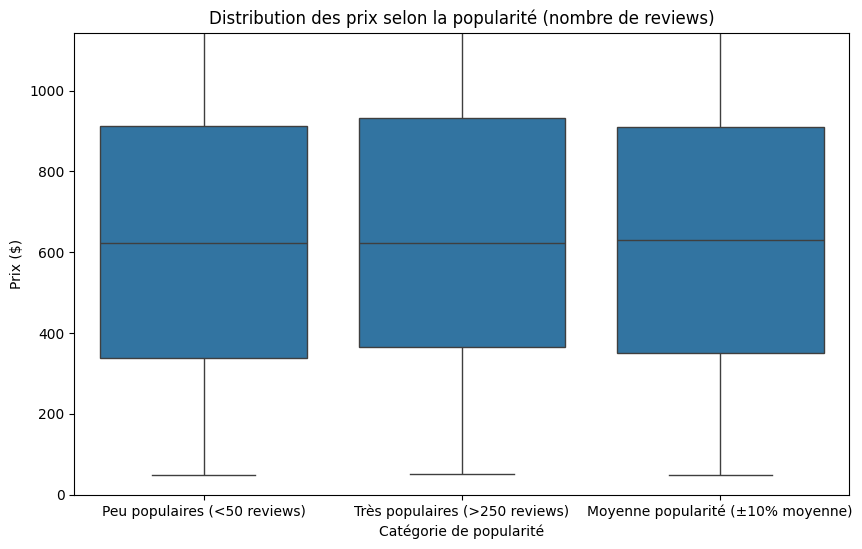

In [24]:
# Ajout d'une colonne catégorie dans df pour faciliter le plot
df['review_category'] = 'Autres'
df.loc[low_reviews.index, 'review_category'] = 'Peu populaires (<50 reviews)'
df.loc[medium_reviews.index, 'review_category'] = 'Moyenne popularité (±10% moyenne)'
df.loc[high_reviews.index, 'review_category'] = 'Très populaires (>250 reviews)'

# --- Boxplot prix par catégorie ---
plt.figure(figsize=(10,6))
sns.boxplot(x='review_category', y='price', data=df[df['review_category'] != 'Autres'])
plt.title("Distribution des prix selon la popularité (nombre de reviews)")
plt.ylabel("Prix ($)")
plt.xlabel("Catégorie de popularité")
plt.ylim(0, df['price'].quantile(0.95))  # Pour limiter les outliers extrêmes
plt.show()

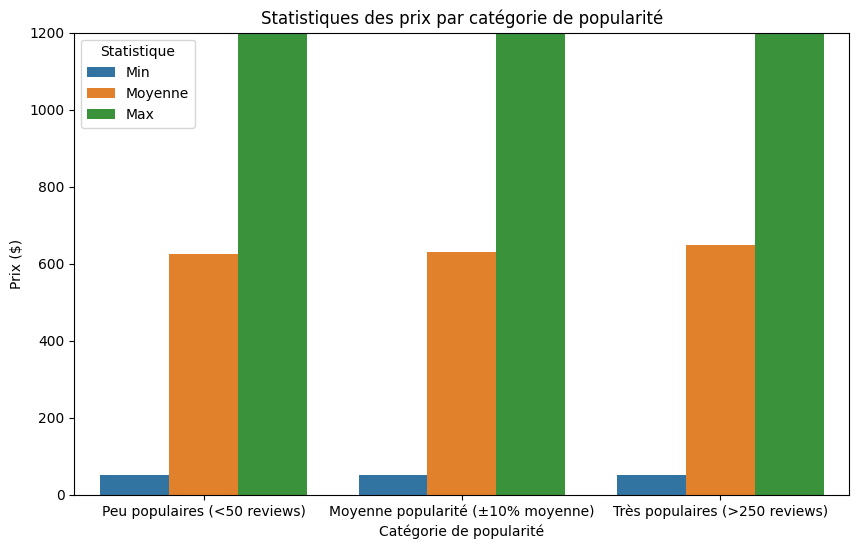

In [25]:
def summarize_price(group):
    prices = group['price'].dropna()
    return prices.min(), prices.mean(), prices.max()

summary_stats = {}
for label, group in [('Peu populaires (<50 reviews)', low_reviews),
                     ('Moyenne popularité (±10% moyenne)', medium_reviews),
                     ('Très populaires (>250 reviews)', high_reviews)]:
    summary_stats[label] = summarize_price(group)

# Préparer dataframe pour barplot
stats_df = pd.DataFrame(summary_stats, index=['Min', 'Moyenne', 'Max']).T.reset_index().rename(columns={'index':'Categorie'})

# Melt pour seaborn
stats_melt = stats_df.melt(id_vars='Categorie', var_name='Statistique', value_name='Prix')

plt.figure(figsize=(10,6))
sns.barplot(x='Categorie', y='Prix', hue='Statistique', data=stats_melt)
plt.title("Statistiques des prix par catégorie de popularité")
plt.ylabel("Prix ($)")
plt.xlabel("Catégorie de popularité")
plt.ylim(0, stats_melt['Prix'].quantile(0.95))  # Limiter les valeurs extrêmes
plt.legend(title='Statistique')
plt.show()

### Utilisateurs vérifiés sont mieux mis en avant sur AIRBNB (donc plus de review) => Point de sécurité, ca attire les gens ? 

In [30]:
print(df.columns)


Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license', 'is_manhattan',
       'review_category'],
      dtype='object')


Moyenne nombre de reviews :
 host_verified_bool
False    27.496035
True     27.266817
Name: number of reviews, dtype: float64


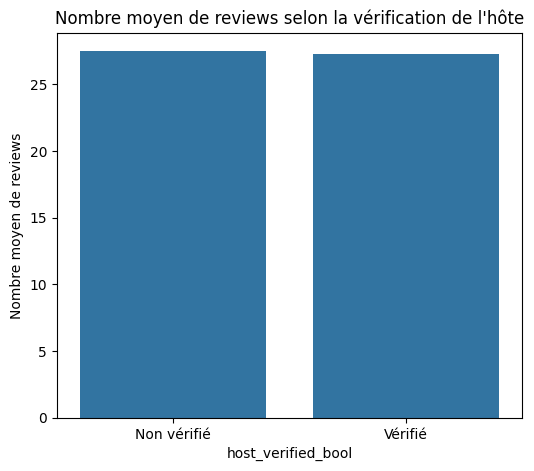

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Nettoyer et filtrer
df_filtered = df[df['host_identity_verified'].isin(['verified', 'unconfirmed'])].copy()

# Créer booléen : True si vérifié
df_filtered['host_verified_bool'] = df_filtered['host_identity_verified'] == 'verified'

# Convertir nombre de reviews en numérique et supprimer NaN
df_filtered['number of reviews'] = pd.to_numeric(df_filtered['number of reviews'], errors='coerce')
df_filtered = df_filtered.dropna(subset=['number of reviews'])

# Calculer la moyenne des reviews par groupe
mean_reviews = df_filtered.groupby('host_verified_bool')['number of reviews'].mean()

print("Moyenne nombre de reviews :\n", mean_reviews)

# Plot simple
plt.figure(figsize=(6,5))
sns.barplot(x=mean_reviews.index.map({False:'Non vérifié', True:'Vérifié'}), y=mean_reviews.values)
plt.ylabel("Nombre moyen de reviews")
plt.title("Nombre moyen de reviews selon la vérification de l'hôte")
plt.show()


#### Quartier proche des lieux touristiques sont plus consultés 
=> Les lieux touristiques ? genre jsp l'empire state building, c'est dans quelle quartier ? est ce que ce quartie fait partie des plus review ? 



In [34]:
# Afficher valeurs uniques des colonnes quartiers
print("Valeurs uniques dans 'neighbourhood group' :")
print(df['neighbourhood group'].unique())

print("\nQuelques valeurs uniques dans 'neighbourhood' :")
print(df['neighbourhood'].unique()[:20])  # Juste un échantillon

print("\nStatistiques sur 'number of reviews' :")
print(df['number of reviews'].describe())


Valeurs uniques dans 'neighbourhood group' :
['Brooklyn' 'Manhattan' 'brookln' 'manhatan' 'Queens' nan 'Staten Island'
 'Bronx']

Quelques valeurs uniques dans 'neighbourhood' :
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village']

Statistiques sur 'number of reviews' :
count    102599.000000
mean         27.434722
std          49.478373
min           0.000000
25%           1.000000
50%           7.000000
75%          30.000000
max        1024.000000
Name: number of reviews, dtype: float64


Nombre moyen de reviews pour quartiers touristiques sélectionnés :
neighbourhood
Harlem     32.897548
Chelsea    25.936105
Midtown    16.531563
Name: number of reviews, dtype: float64


C:\Users\ethan\AppData\Local\Temp\ipykernel_5508\1173517087.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_reviews.index, y=mean_reviews.values, palette='mako')


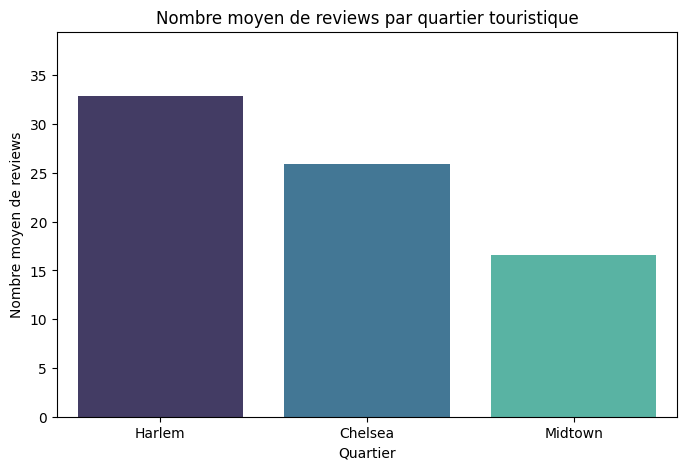

In [36]:


# Nettoyage : correction de la casse dans 'neighbourhood group'
df['neighbourhood group'] = df['neighbourhood group'].str.title()
df['neighbourhood group'] = df['neighbourhood group'].replace({'Brookln': 'Brooklyn', 'Manhatan': 'Manhattan'})

# Nettoyage : convertir number of reviews en numérique et supprimer NaN
df['number of reviews'] = pd.to_numeric(df['number of reviews'], errors='coerce')
df_clean = df.dropna(subset=['number of reviews', 'neighbourhood'])

# Choix quartiers touristiques
touristic_neigh = ['Midtown', 'Chelsea', 'Harlem']

# Filtrer data pour ces quartiers
df_touristic = df_clean[df_clean['neighbourhood'].isin(touristic_neigh)]

# Moyenne des reviews par quartier
mean_reviews = df_touristic.groupby('neighbourhood')['number of reviews'].mean().sort_values(ascending=False)

print("Nombre moyen de reviews pour quartiers touristiques sélectionnés :")
print(mean_reviews)

# Graphique
plt.figure(figsize=(8,5))
sns.barplot(x=mean_reviews.index, y=mean_reviews.values, palette='mako')
plt.title("Nombre moyen de reviews par quartier touristique")
plt.ylabel("Nombre moyen de reviews")
plt.xlabel("Quartier")
plt.ylim(0, mean_reviews.max() * 1.2)
plt.show()


Stats par quartier touristique :
               mean_reviews  mean_price
neighbourhood                          
Chelsea           25.926754  633.500877
Harlem            32.922471  626.802419
Midtown           16.563314  609.547041


<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ethan\AppData\Local\Temp\ipykernel_5508\3415974404.py:7: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$, ]', '', regex=True).astype(float)
C:\Users\ethan\AppData\Local\Temp\ipykernel_5508\3415974404.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stats.index, y=stats['mean_reviews'], ax=ax1, palette='mako')


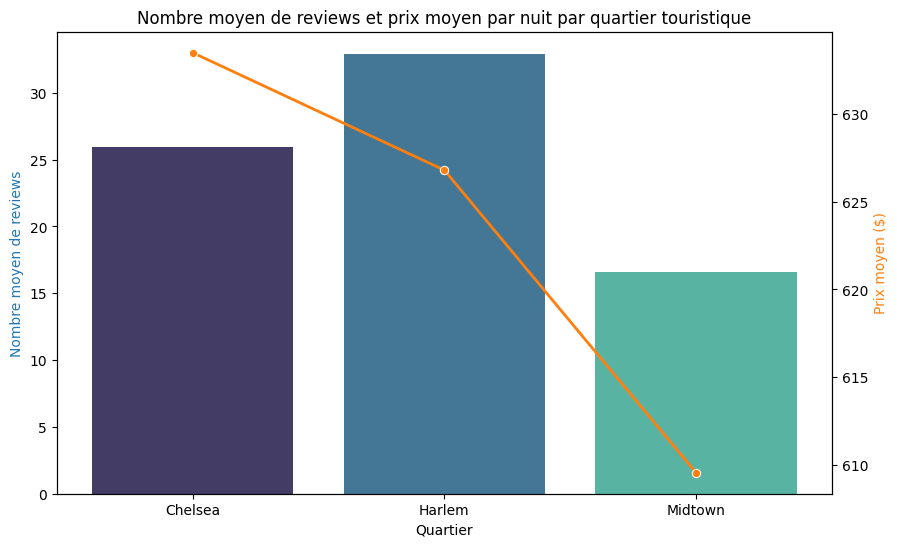

In [37]:
# Nettoyage : correction de la casse dans 'neighbourhood group'
df['neighbourhood group'] = df['neighbourhood group'].str.title()
df['neighbourhood group'] = df['neighbourhood group'].replace({'Brookln': 'Brooklyn', 'Manhatan': 'Manhattan'})

# Nettoyage : convertir number of reviews et price en numérique, supprimer NaN
df['number of reviews'] = pd.to_numeric(df['number of reviews'], errors='coerce')
df['price'] = df['price'].replace('[\$, ]', '', regex=True).astype(float)
df_clean = df.dropna(subset=['number of reviews', 'neighbourhood', 'price'])

# Quartiers touristiques
touristic_neigh = ['Midtown', 'Chelsea', 'Harlem']

# Filtrer data pour ces quartiers
df_touristic = df_clean[df_clean['neighbourhood'].isin(touristic_neigh)]

# Moyenne des reviews et prix par quartier
stats = df_touristic.groupby('neighbourhood').agg({
    'number of reviews': 'mean',
    'price': 'mean'
}).rename(columns={'number of reviews': 'mean_reviews', 'price': 'mean_price'})

print("Stats par quartier touristique :")
print(stats)

# Graphiques côte à côte
fig, ax1 = plt.subplots(figsize=(10,6))

sns.barplot(x=stats.index, y=stats['mean_reviews'], ax=ax1, palette='mako')
ax1.set_ylabel('Nombre moyen de reviews', color='tab:blue')
ax1.set_xlabel('Quartier')
ax1.set_title('Nombre moyen de reviews et prix moyen par nuit par quartier touristique')

# Création d'un deuxième axe y pour le prix
ax2 = ax1.twinx()
sns.lineplot(x=stats.index, y=stats['mean_price'], ax=ax2, color='tab:orange', marker='o', linewidth=2)
ax2.set_ylabel('Prix moyen ($)', color='tab:orange')

plt.show()

### les logements de types appartement sont les plus recherches : 
On est à NYC, les appartements entiers sont les plus recherchés. Type loft ou jsp


Valeurs uniques dans 'room type' :
['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']
                 count_listings  mean_reviews  median_reviews
room type                                                    
Entire home/apt           53701     27.337647             8.0
Private room              46556     27.744415             7.0
Shared room                2226     20.380952             5.0
Hotel room                  116     83.439655            18.0


C:\Users\ethan\AppData\Local\Temp\ipykernel_5508\1061543704.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stats_room.reset_index(), x='room type', y='count_listings', palette='viridis')


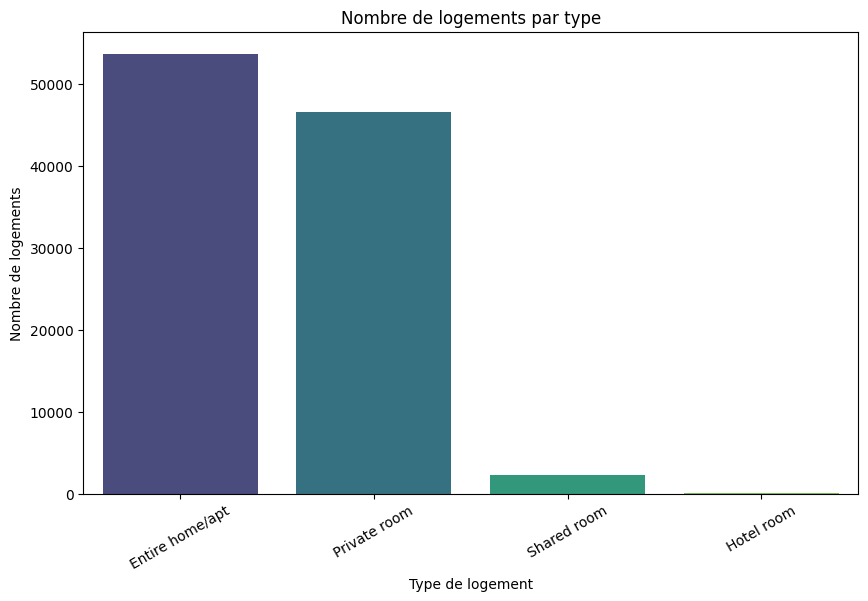

In [38]:
# Afficher les valeurs uniques dans la colonne 'room type' pour voir les catégories
print("Valeurs uniques dans 'room type' :")
print(df['room type'].unique())

# Nettoyage : convertir 'number of reviews' en numérique
df['number of reviews'] = pd.to_numeric(df['number of reviews'], errors='coerce')

# Calculer nombre de logements, moyenne et médiane des reviews par type de logement
stats_room = df.groupby('room type').agg(
    count_listings = ('id', 'count'),
    mean_reviews = ('number of reviews', 'mean'),
    median_reviews = ('number of reviews', 'median')
).sort_values(by='count_listings', ascending=False)

print(stats_room)

# Graph barres du nombre de logements par type
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=stats_room.reset_index(), x='room type', y='count_listings', palette='viridis')
plt.title("Nombre de logements par type")
plt.ylabel("Nombre de logements")
plt.xlabel("Type de logement")
plt.xticks(rotation=30)
plt.show()


C:\Users\ethan\AppData\Local\Temp\ipykernel_5508\1998806752.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='room type', y='count_listings', data=stats_room, ax=ax1, palette='viridis')
C:\Users\ethan\AppData\Local\Temp\ipykernel_5508\1998806752.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)


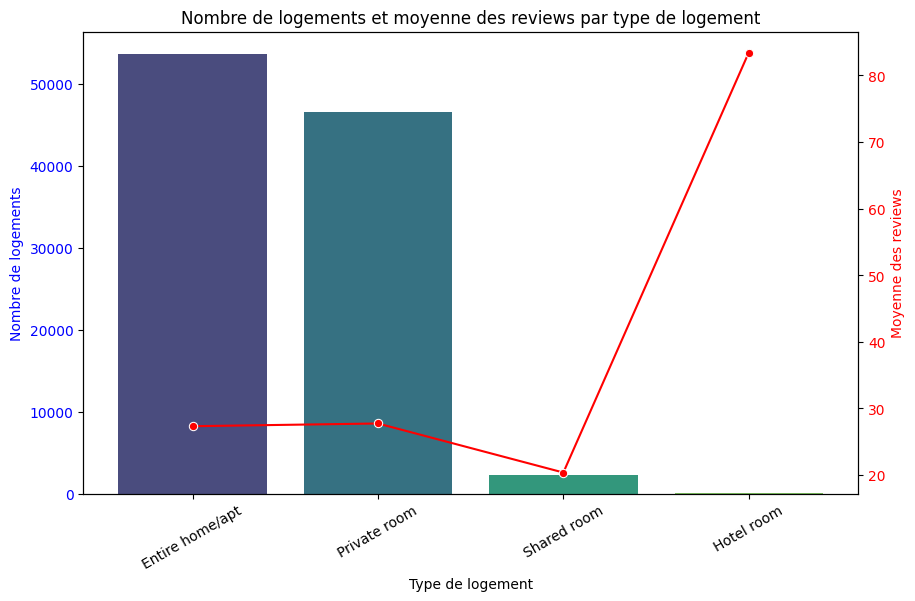

In [39]:
#Préparer les données
stats_room = stats_room.reset_index()

fig, ax1 = plt.subplots(figsize=(10,6))

# Bar plot : nombre de logements
sns.barplot(x='room type', y='count_listings', data=stats_room, ax=ax1, palette='viridis')
ax1.set_ylabel('Nombre de logements', color='b')
ax1.set_xlabel('Type de logement')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)

# Ligne : moyenne des reviews
ax2 = ax1.twinx()
sns.lineplot(x='room type', y='mean_reviews', data=stats_room, ax=ax2, color='r', marker='o')
ax2.set_ylabel('Moyenne des reviews', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title("Nombre de logements et moyenne des reviews par type de logement")
plt.show()

Il y'a 116 Hotel room pour contexte            